<a href="https://colab.research.google.com/github/BattalovTN/Battalov_statprak/blob/main/homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://drive.google.com/file/d/1b7tSyJBpWggHEBGdWa80JdKh7VNq2FEf/view?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Serial test

Idea: break the sequence $x_1, x_2, x_3, ..., x_{2n}$ into consecutive series of length $2$: $(x_1, x_2), (x_3, x_4), ..., (x_{2n-1}, x_{2n})$ and look at each element as a random and independent point in $2D$ space. Next, apply chi-square. Similarly, one can construct series of length $3, 4$, etc.

### Problem 1
Implement serial test and apply to a `samples`

In [1]:
import numpy as np
from scipy import stats

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

rng.current = 1

samples = [rng() for _ in range(1000)]
samples_pairs = list(zip(samples[0::2], samples[1::2])) #разбили на пары, как в условии

k = 20
f_obs = np.histogram(samples, np.linspace(0, 1, k+1))[0]
f_exp = np.full(k, len(samples) // k)

print(f_obs, f_exp, stats.chisquare(f_obs, f_exp)) #должно получится больше 0.05 для pvalue


[41 49 54 60 48 39 51 53 51 49 50 48 38 46 46 66 50 61 56 44] [50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50] Power_divergenceResult(statistic=19.279999999999998, pvalue=0.4390107032251506)


### Permutation test

We again decompose the sequence $x_1, x_2, x_3, ..., x_{dn}$ into consecutive series of length $d$: $(x_1, ..., x_d), (x_{d+1}, x_{2d+d}), \ldots, (x_{nd-d+1}, x_{nd})$. A series of $d$ elements can be ordered in $d!$ ways and each way of ordering is equally probable. Hence the idea of the test is to count how many times each ordering occurs among $n$ series and apply the $\chi^2$ test.

### Problem 2*
Implement permutation test and apply to a `samples`

In [2]:
import numpy as np
from scipy import stats
from itertools import permutations

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

rng.current = 1

samples = [rng() for _ in range(1000)]
d = 4
samples_series = [samples[i:i+d] for i in range(0, 1000 - d + 1, d)] #разбиение на последовательности длины d

permutations = list(permutations(range(d))) #все перестановки
count = {p: 0 for p in permutations} #установили изначальные 0 вхождений для всех

for s in samples_series:
    ranks = np.argsort(s)
    count[tuple(ranks)] += 1 #подсчитываем вхождения каждой

f_obs = np.array(list(count.values()))
f_exp = np.full(len(f_obs), len(samples_series) / len(permutations))

print(f_obs, f_exp, stats.chisquare(f_obs, f_exp))

[11 16 16 11  9 10  8  8  6 14 10  8  9  6 10 12 11 10  8  6 17 15 11  8] [10.41666667 10.41666667 10.41666667 10.41666667 10.41666667 10.41666667
 10.41666667 10.41666667 10.41666667 10.41666667 10.41666667 10.41666667
 10.41666667 10.41666667 10.41666667 10.41666667 10.41666667 10.41666667
 10.41666667 10.41666667 10.41666667 10.41666667 10.41666667 10.41666667] Power_divergenceResult(statistic=22.64, pvalue=0.48194973543642283)


### Problem 3

Provide a statistical test to show that `rng_bad` has problems but `rng_good` does not.

In [3]:
import numpy as np
from scipy import stats

def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m

rng_bad.current = 1

def rng_good(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

rng_good.current = 1

bad_samples = [rng_bad() for _ in range(1000)]
good_samples = [rng_good() for _ in range(1000)]

k = 20
f_obs_good = np.histogram(good_samples, np.linspace(0, 1, k+1))[0]
f_exp_good = np.full(k, len(good_samples) // k)
f_obs_bad = np.histogram(bad_samples, np.linspace(0, 1, k+1))[0]
f_exp_bad = np.full(k, len(bad_samples) // k)

print(f_obs_good, f_exp_good, stats.chisquare(f_obs_good, f_exp_good)) #тут должно получится хорошее значение (больше 0.05)
print(f_obs_bad, f_exp_bad, stats.chisquare(f_obs_bad, f_exp_bad)) #тут должно получится плохое значение (меньше 0.05)

[49 47 50 39 51 58 43 58 44 58 51 67 52 57 50 43 48 48 54 33] [50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50] Power_divergenceResult(statistic=22.279999999999994, pvalue=0.27054351335208165)
[55 48 36 53 33 46 63 41 55 53 41 53 62 40 56 70 50 52 46 47] [50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50] Power_divergenceResult(statistic=32.44, pvalue=0.027867772740595254)


* More randomness tests - [Diehard tests](https://en.wikipedia.org/wiki/Diehard_tests).
* More methods for generating a uniform value [here](https://en.wikipedia.org/wiki/List_of_random_number_generators).
* A story about dynamical systems and the transition to chaos https://www.youtube.com/watch?v=ovJcsL7vyrk&feature=youtu.be

# Generating a sample from a given distribution

Suppose we have a random number generator from the segment [0, 1] (use the `np.random.rand()` function for this). How to get a sample from another distribution $F$?

### Problem 4
Simulate a sample of 1000 from a discrete distribution on a set of digits $0, 1, 2, \ldots, 9$ with weights $0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2$. Construct a histogram from the sample. Optimise the algorithm by ordering the weights.

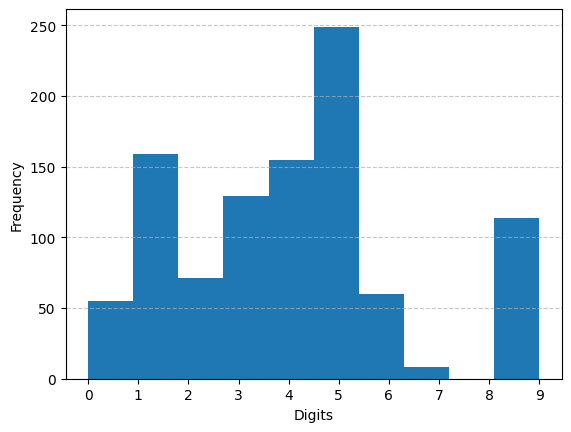

In [4]:
import numpy as np
import matplotlib.pyplot as plt

weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
digits = np.arange(10)

weights /= weights.sum() #нормируем веса

#сортировка индексов и весов
sort_indexes = np.argsort(weights)
sorted_digits = digits[sort_indexes]
sorted_weights = weights[sort_indexes]

sample = np.random.choice(sorted_digits, size=1000, p=sorted_weights)

plt.hist(sample)
plt.ylabel("Frequency")
plt.xlabel("Digits")
plt.xticks(digits)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Inverse transform method

The following proposition is the idea behind the *inverse transform* method:

If $\xi$ has a uniform distribution in $[0,1]$, then $F^{-1}(\xi)$ is distributed according to the law of $F$. (For which $F$ is this true?)

### Problem 5
Simulate a sample of size 1000 from the distribution $\operatorname{Exp}(\lambda)$ using the Inverse transform method. Construct a sample histogram and an accurate plot of the distribution density.

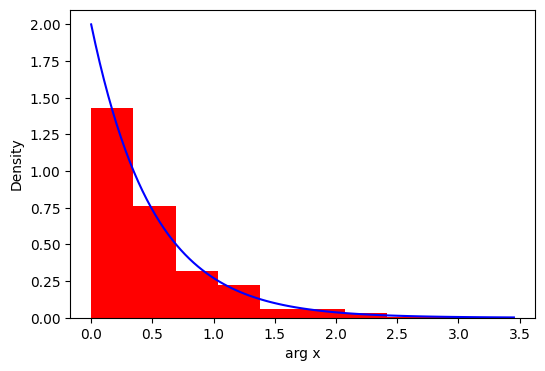

In [5]:
import numpy as np
import matplotlib.pyplot as plt

la = 2 #константа лямбда
samples = np.array([rng() for _ in range(1000)])
exp_samples = -np.log(1 - samples) / la #по формуле экспоненциального закона

#рисуем
plt.figure(figsize = (6, 4))
plt.hist(exp_samples, density=True, color='red')
x = np.linspace(0, max(exp_samples), 100)
plt.plot(x, la * np.exp(-la*x), color='blue')
plt.xlabel('arg x')
plt.ylabel('Density')
plt.show()


## Rejection sampling (Accept-reject method)

The idea of the method is to sample from the distribution we know how to sample from, and then select points that follow the desired distribution. More precisely: let's say we know how to sample from a distribution with density $p$, and we want to sample from a distribution with density $\pi$. Let's take a random $x$ from the distribution $p$. Then take $y$ uniformly distributed on the interval $[0, p(x)]$. If the point $(x, y)$ falls under the graph of $\pi$, we take $x$ as a sampling element from $\pi$. If not, we repeat the procedure for a new $x$. The picture illustrates the idea of the method (the densities are normalised so that one lies entirely under the other):

<img src=https://colcarroll.github.io/hamiltonian_monte_carlo_talk/images/bayes_talk.015.png style="width: 50%;"/>

### Problem 6
Justify (orally) that the accept-reject method really samples from the required distribution. Simulate $1000$ points from the distribution with density $e^xcos^2x \cdot \mathbb{I}_{[-\frac\pi2, \frac\pi2]}$. Plot the sampled histogram on the sample and compare it with the plot of the exact density function.

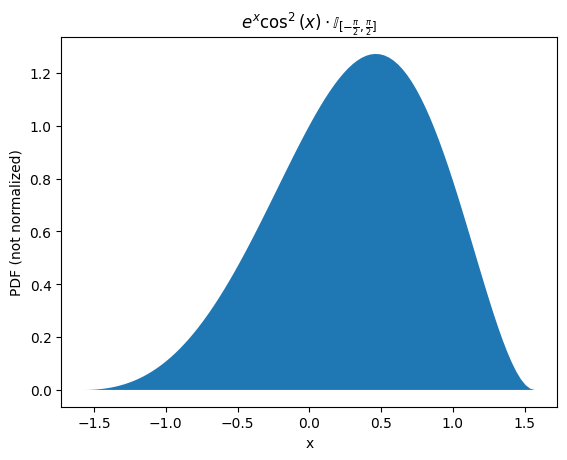

In [6]:
fig = plt.figure()

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x) * np.cos(x) ** 2 # not normalized density!
plt.fill_between(x, 0, density)
plt.ylabel('PDF (not normalized)')
plt.xlabel('x')
plt.title(r'$e^x \cos^2(x) \cdot \mathbb{I}_{[-\frac{\pi}{2}, \frac{\pi}{2}]}$')

plt.show()

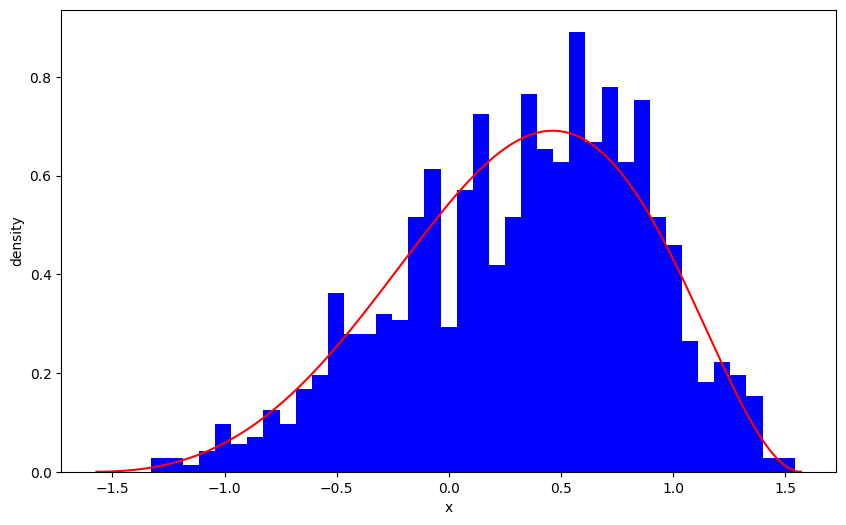

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def expon(x):
    return np.exp(x) * np.cos(x) ** 2

x = np.linspace(-np.pi / 2, np.pi / 2, 1000)
const = np.max(expon(x)) * (np.pi) #константа из равномерного распределения

samples = []
while len(samples) < 1000:
    x = np.random.uniform(-np.pi / 2, np.pi / 2)
    y = np.random.uniform(0, const)
    if y < expon(x):
        samples.append(x)


plt.figure(figsize=(10, 6))
plt.hist(samples, bins = 40, density=True, color='blue')


x = np.linspace(-np.pi / 2, np.pi / 2, 1000)
density = expon(x) / np.trapz(expon(x), x)  #нормируем плотность
plt.plot(x, density, color = 'red')


plt.xlabel('x')
plt.ylabel('density')
plt.show()


## Coordinate transformation method

The accept-reject method may in some cases be inefficient and require too many sample points. An alternative is to try to find a coordinate transformation that converts a simple area (from which it is easy to sample, for example, a unit square) into the required area, but preserves the area ratio (why?).

### Problem 7
Model and depict a sample of 500 points uniformly distributed within a given triangle without using a selection method.

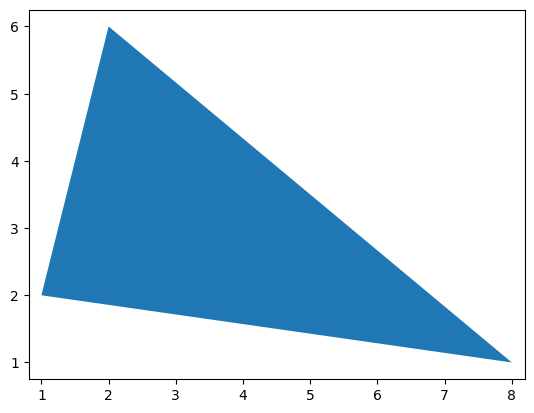

In [8]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure()

polygon = Polygon(xy=np.array([[1, 2], [2, 6], [8, 1]]), closed=True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.axis('equal')
plt.show()

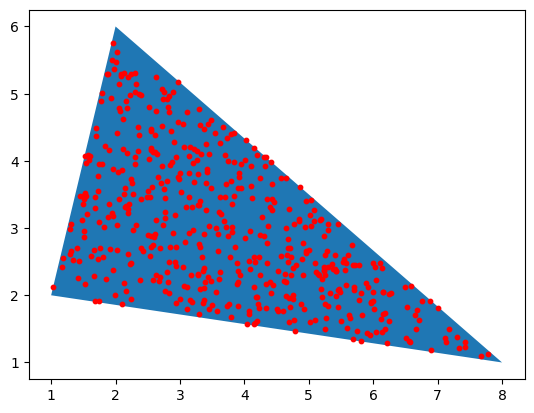

In [9]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

triangle = np.array([[1, 2], [2, 6], [8, 1]])
points = []

def points_in_triangle(triangle, n): #функция генерации точек
    for _ in range(n):
        u, v = np.random.rand(2) #генерация чисел между 0 и 1
        if u + v > 1:
            u, v = 1 - u, 1 - v
        point = (1 - u - v) * triangle[0] + u * triangle[1] + v * triangle[2] #генерация точек с помощью заданных u и v
        points.append(point)
    return np.array(points)

points = points_in_triangle(triangle, 500) #500 точек внутри треугольника

fig, ax = plt.subplots()
polygon = Polygon(triangle, closed = True)
ax.add_patch(polygon)
ax.scatter(points[:,0], points[:,1], color = 'red', s = 10)
plt.show()



### Problem 8
Model without using the selection method a sample of $500$ points uniformly distributed inside the unit circle. Picture the obtained points. Do they really fill the circle uniformly?

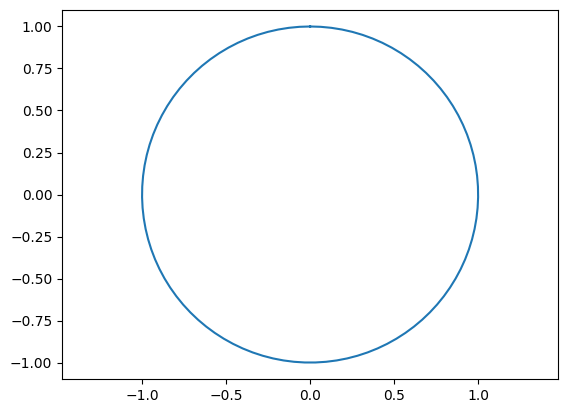

In [10]:
fig = plt.figure()

t = np.linspace(0, 2*np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

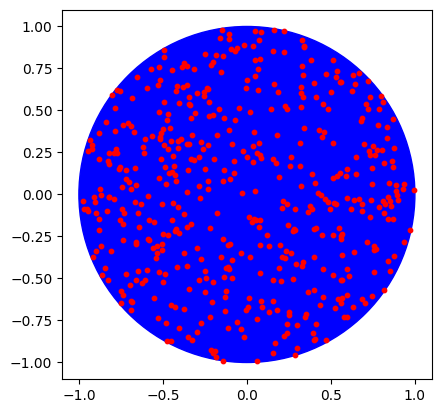

In [11]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

def points_in_circle(n):
  r = np.sqrt(np.random.uniform(0, 1, n)) #берём корень, чтобы точки лежали равномерно, иначе они будут смещены ближе к центру
  phi = np.random.uniform(0, 2 * np.pi, n) #рандомный угол
  x = r * np.cos(phi)
  y = r * np.sin(phi)
  return x, y

x, y = points_in_circle(500) #500 точек внутри круга

fig, ax = plt.subplots()
circle = plt.Circle((0, 0), 1, color='blue')
ax.add_patch(circle)
ax.scatter(x, y, s=10, color='red')
ax.set_aspect('equal')
plt.show()

# Random normal generator

### Problem 9
Prove (orally) that the following algorithm (**Box-Muller algorithm**, https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) generates a sample of independent $\mathcal{N}(0,1)$ random variables. Modify the method to exclude calls of trigonometric functions `np.sin` and `np.cos`. Using the modified method, simulate a sample size of $1000$ from a $2D$ Gaussian distribution with mean $\mu$ and covariance matrix $\Sigma$, where
$$\mu = \begin{pmatrix} 4 \\ 7 \end{pmatrix}^T, \quad \Sigma = \begin{pmatrix} 20 & -4 \\ -4 & 40 \end{pmatrix}.$$
Construct a 2D histogram of the resulting distribution. Compare the sample mean and covariance matrix with the exact values.

In [12]:
import seaborn as sns

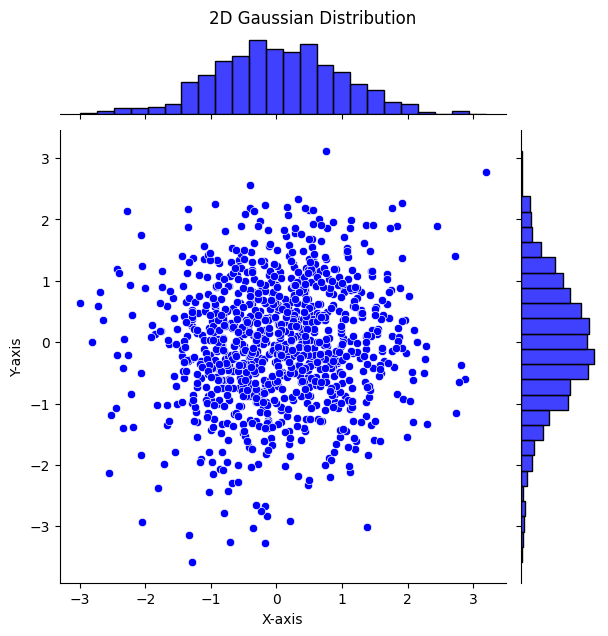

In [13]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)


joint_plot = sns.jointplot(x=x, y=y, color="blue")
joint_plot.set_axis_labels('X-axis', 'Y-axis')
plt.suptitle('2D Gaussian Distribution', y=1.02)
plt.show()

### Problem 10*

Implement a method of generating a random partition of an n-element set into subsets. Use it to estimate the expected number of subsets in a random partition of a set of 100 elements.

Hint 1: Ширяев, Вероятность, т1, задача 2 к параграфу 1.

Hint 2: http://djalil.chafai.net/blog/2012/05/03/generating-uniform-random-partitions/

In [14]:
# Your code here